========PYSPARK========
Number of samples: 97939
Estimated value of Pi is 3.143140117828444
Absolute error is 0.0015474642386510418
Time taken is 1.3625760078430176 seconds
RAM usage: 6.50%
CPU usage: 12.90%


Number of samples: 84276
Estimated value of Pi is 3.1339408609805877
Absolute error is 0.0076517926092054545
Time taken is 0.23000288009643555 seconds
RAM usage: 6.60%
CPU usage: 82.30%


Number of samples: 63246
Estimated value of Pi is 3.1373367485690795
Absolute error is 0.004255905020713602
Time taken is 0.27602720260620117 seconds
RAM usage: 6.70%
CPU usage: 83.20%


Number of samples: 80406
Estimated value of Pi is 3.1452379175683407
Absolute error is 0.003645263978547586
Time taken is 0.2675609588623047 seconds
RAM usage: 6.80%
CPU usage: 81.70%


Number of samples: 37458
Estimated value of Pi is 3.157990282449677
Absolute error is 0.016397628859883717
Time taken is 0.2610504627227783 seconds
RAM usage: 6.80%
CPU usage: 83.50%


Number of samples: 85987
Estimated value of 

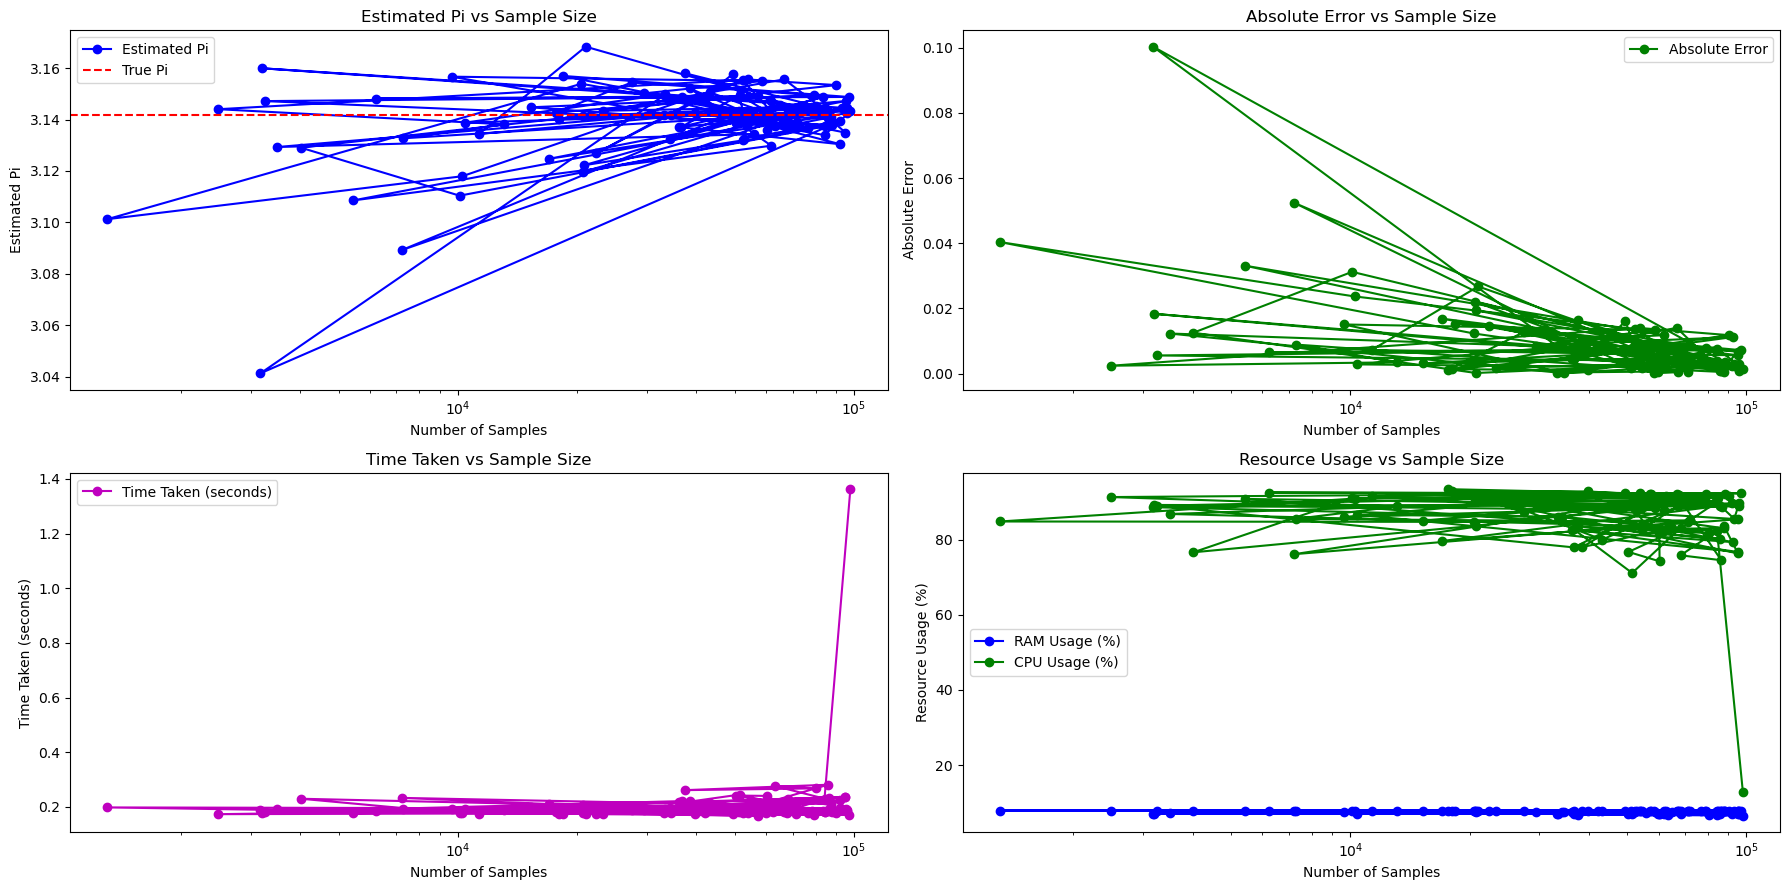

In [1]:
from pyspark import SparkContext, SparkConf
import random
import math
import time
import matplotlib.pyplot as plt
import psutil
import numpy as np
def is_point_inside_unit_circle(p):
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

if __name__ == "__main__":
    # Stop any existing SparkContext
    try:
        sc.stop()
    except:
        pass

    # Initialize Spark Context with increased resources
    conf = SparkConf().setAppName("MonteCarloSimulation").set("spark.executor.memory", "4g").set("spark.executor.cores", "2")
    sc = SparkContext(conf=conf)

    # List of different numbers of samples
    sample_sizes = np.random.randint(10, 100001, 100).tolist()

    # Lists to store results
    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []
    print("========PYSPARK========")
    # Iterate over different sample sizes
    for num_samples in sample_sizes:
        # Start timing
        start_time = time.time()

        # Distribute the samples across the cluster
        samples = sc.parallelize(range(0, num_samples))

        # Perform the Monte Carlo simulation
        count = samples.filter(is_point_inside_unit_circle).count()

        # Estimate Pi
        pi_estimate = 4 * count / num_samples
        pi_estimates.append(pi_estimate)

        # Known value of Pi
        true_pi = math.pi

        # Calculate the absolute error
        absolute_error = abs(pi_estimate - true_pi)
        absolute_errors.append(absolute_error)

        # End timing
        end_time = time.time()

        # Calculate the time taken
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {pi_estimate}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Stop the Spark Context
    sc.stop()

    # Plotting results
    plt.figure(figsize=(18, 9))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g',label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m',label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


========DASK========
Number of samples: 15384
Estimated value of Pi is 3.1479459178367133
Absolute error is 0.006353264246920176
Time taken is 0.05733609199523926 seconds
RAM usage: 7.20%
CPU usage: 10.60%


Number of samples: 78662
Estimated value of Pi is 3.1577874075962273
Absolute error is 0.01619475400643422
Time taken is 0.07492375373840332 seconds
RAM usage: 7.20%
CPU usage: 24.00%


Number of samples: 11769
Estimated value of Pi is 3.153716863739569
Absolute error is 0.012124210149775827
Time taken is 0.08827590942382812 seconds
RAM usage: 7.20%
CPU usage: 28.60%


Number of samples: 33913
Estimated value of Pi is 3.1321349571584753
Absolute error is 0.009457696431317775
Time taken is 0.10916018486022949 seconds
RAM usage: 7.20%
CPU usage: 27.30%


Number of samples: 76170
Estimated value of Pi is 3.1283656856606137
Absolute error is 0.013226967929179434
Time taken is 0.1164853572845459 seconds
RAM usage: 7.20%
CPU usage: 25.00%


Number of samples: 5300
Estimated value of Pi i

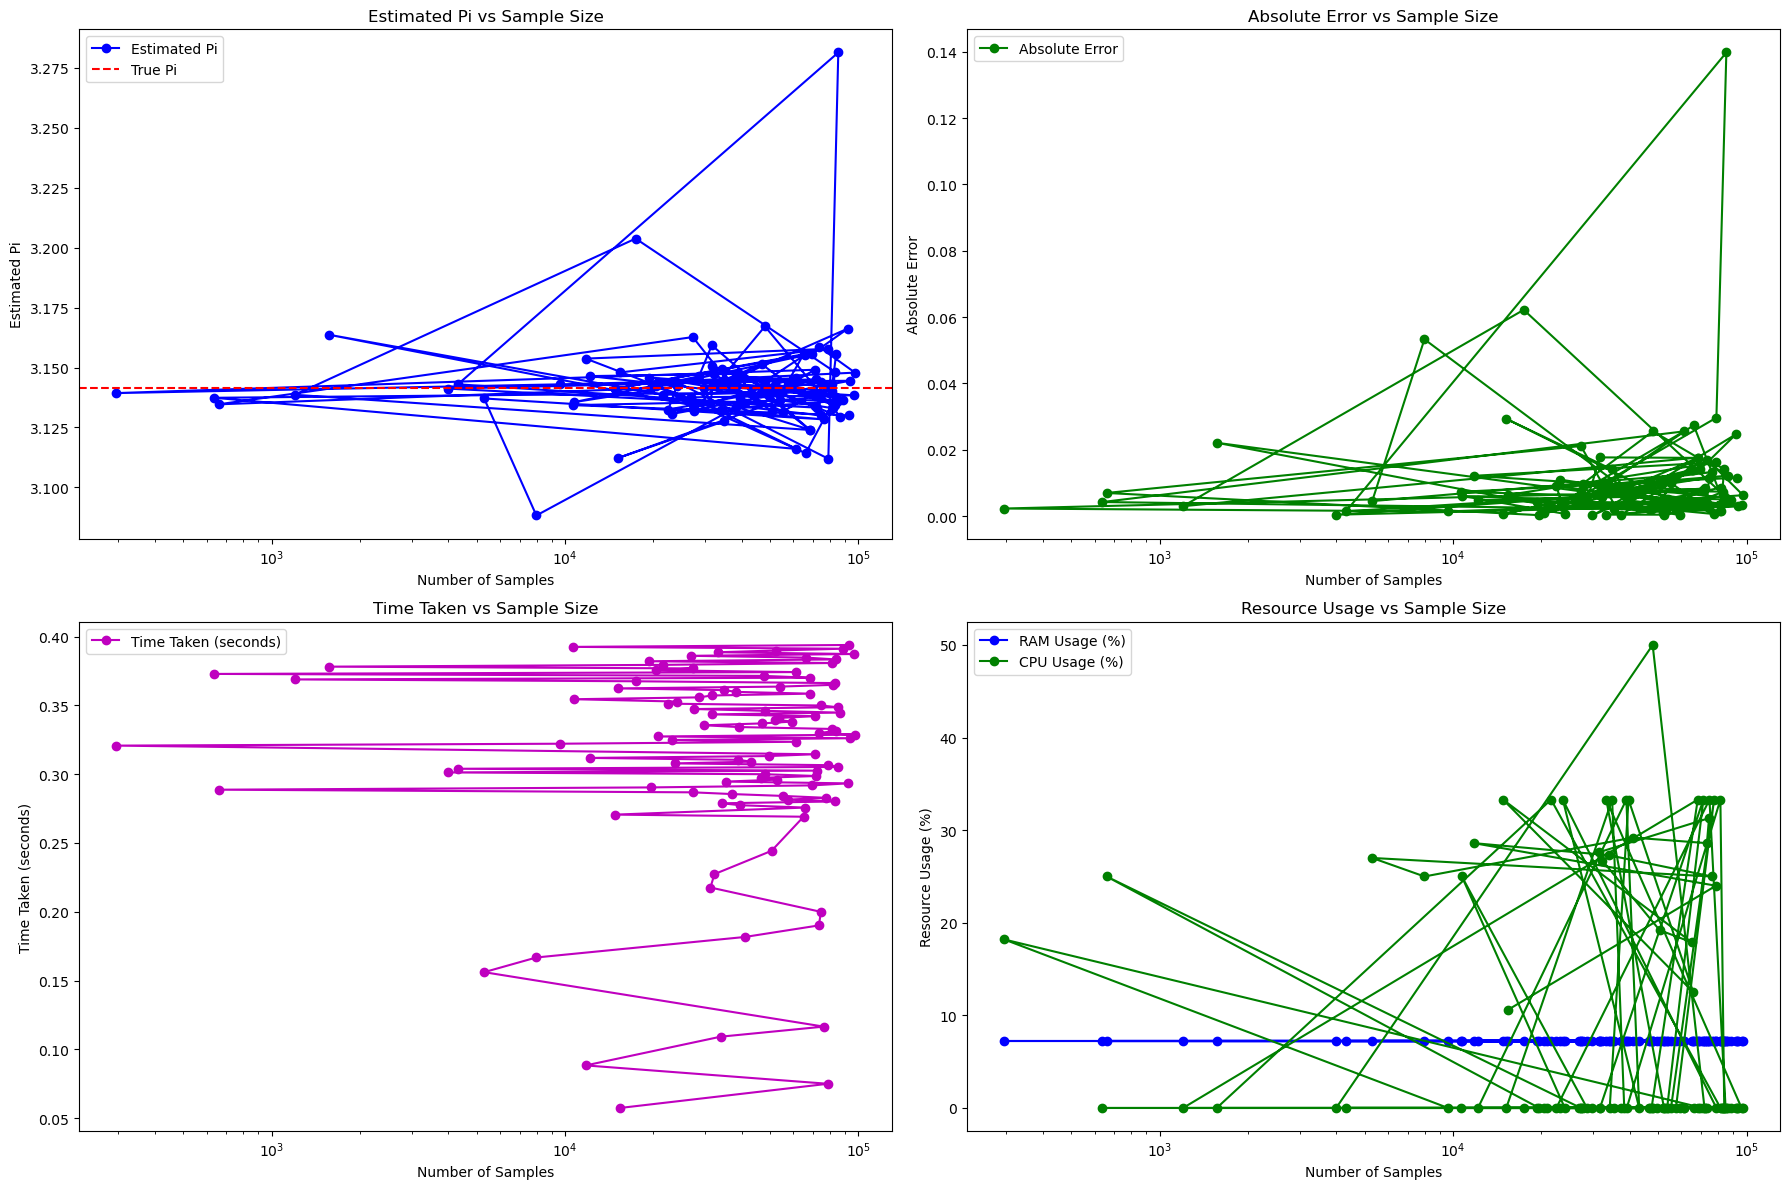

In [2]:
import dask
from dask.distributed import Client, as_completed
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    def is_point_inside_unit_circle(_):
        x, y = random.random(), random.random()
        return x*x + y*y <= 1
    
    counts = [is_point_inside_unit_circle(_) for _ in range(num_samples)]
    count_inside_circle = sum(counts)
    
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    # Dask Client setup
    client = Client()

    sample_sizes = np.random.randint(10, 100001, 100).tolist()
    futures = []
    for num_samples in sample_sizes:
        # Scatter the function and arguments to the workers
        future = client.submit(monte_carlo_simulation, num_samples)
        futures.append(future)

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========DASK========")
    # Retrieve results as they complete
    for i, future in enumerate(as_completed(futures)):
        result = future.result()
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {sample_sizes[i]}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Close the Dask client
    client.close()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


2024-07-19 15:54:07,369	WARNING services.py:2010 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=9.71gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-07-19 15:54:07,504	INFO worker.py:1788 -- Started a local Ray instance.


========RAY========
Number of samples: 59486
Estimated value of Pi is 3.142588172006859
Absolute error is 0.0009955184170657994
Time taken is 7.262484312057495 seconds
RAM usage: 13.20%
CPU usage: 43.90%


Number of samples: 14758
Estimated value of Pi is 3.148123051904052
Absolute error is 0.006530398314259056
Time taken is 9.156544208526611 seconds
RAM usage: 13.20%
CPU usage: 49.70%


Number of samples: 21666
Estimated value of Pi is 3.137635004153974
Absolute error is 0.0039576494358191106
Time taken is 12.0436532497406 seconds
RAM usage: 13.30%
CPU usage: 48.70%


Number of samples: 62631
Estimated value of Pi is 3.144129903721799
Absolute error is 0.002537250132006008
Time taken is 20.33597445487976 seconds
RAM usage: 13.40%
CPU usage: 49.60%


Number of samples: 75752
Estimated value of Pi is 3.1471116274157778
Absolute error is 0.005518973825984652
Time taken is 30.804765939712524 seconds
RAM usage: 13.60%
CPU usage: 47.70%


Number of samples: 63919
Estimated value of Pi is 3.

(is_point_inside_unit_ci pid=37162) rcle


Number of samples: 82592
Estimated value of Pi is 3.1317803177063155
Absolute error is 0.00981233588347763
Time taken is 246.02721166610718 seconds
RAM usage: 14.30%
CPU usage: 46.50%


Number of samples: 32155
Estimated value of Pi is 3.1339449541284403
Absolute error is 0.007647699461352797
Time taken is 250.504700422287 seconds
RAM usage: 14.30%
CPU usage: 46.90%


Number of samples: 62613
Estimated value of Pi is 3.1420312075767014
Absolute error is 0.0004385539869082855
Time taken is 259.64257407188416 seconds
RAM usage: 14.30%
CPU usage: 45.70%


Number of samples: 11242
Estimated value of Pi is 3.160291763031489
Absolute error is 0.01869910944169595
Time taken is 261.6143159866333 seconds
RAM usage: 14.20%
CPU usage: 39.70%


Number of samples: 43458
Estimated value of Pi is 3.14731464862626
Absolute error is 0.005721995036466865
Time taken is 267.58119893074036 seconds
RAM usage: 14.30%
CPU usage: 47.80%


Number of samples: 75686
Estimated value of Pi is 3.1394973971408184
Abs

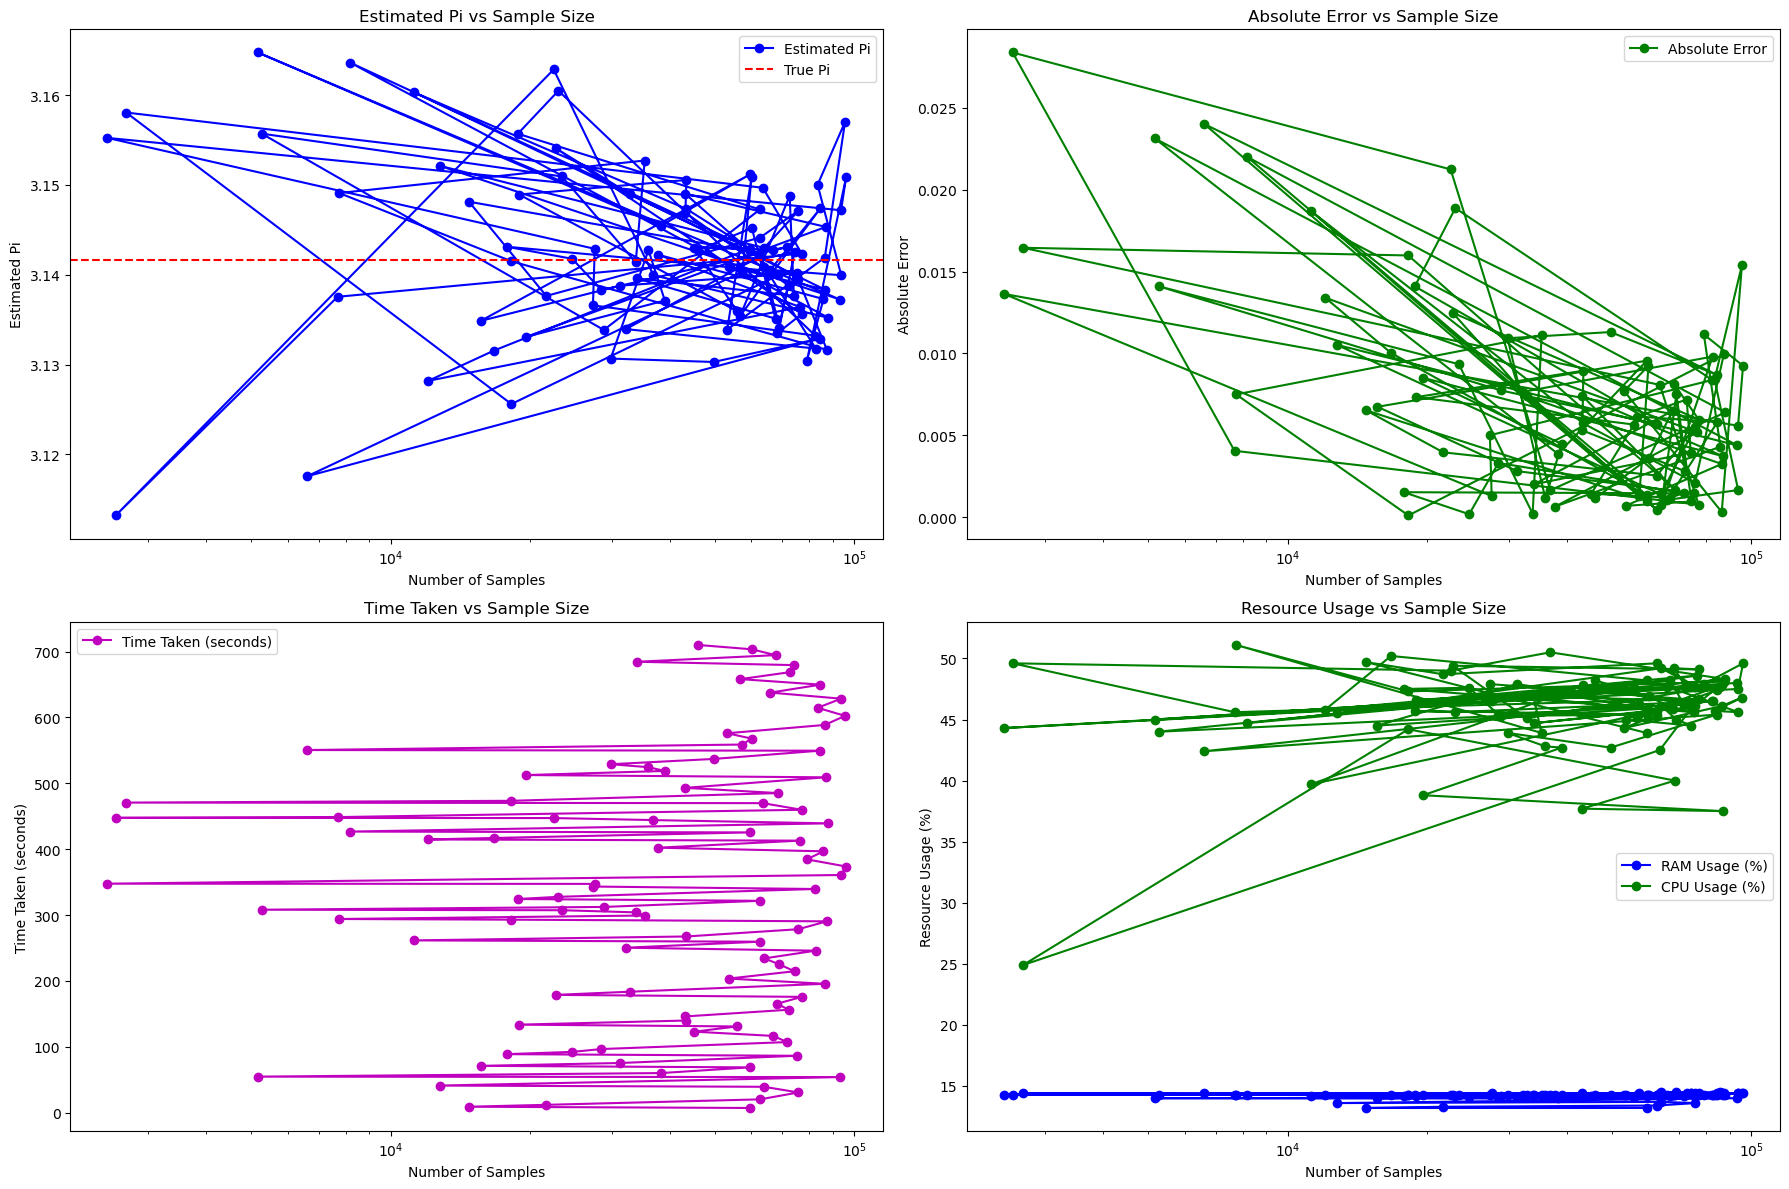

In [3]:
# pip install ray
import ray
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Initialize Ray
ray.init()

# Function to check if a point is inside the unit circle
@ray.remote
def is_point_inside_unit_circle():
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    # Submit tasks to Ray workers
    futures = [is_point_inside_unit_circle.remote() for _ in range(num_samples)]
    
    # Count the number of points inside the circle
    count_inside_circle = sum(ray.get(futures))
    
    # Estimate Pi
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    sample_sizes = np.random.randint(10, 100001, 100).tolist()

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========RAY========")
    # Perform Monte Carlo simulation for different sample sizes
    for num_samples in sample_sizes:
        # Execute Monte Carlo simulation using Ray
        result = monte_carlo_simulation(num_samples)
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Shutdown Ray
    ray.shutdown()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [4]:
print('over')

over
